In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
data = pd.read_csv('SBERP_prepared.csv')

In [4]:
print(data[:10])
print(len(data))

       DATE   TIME1  OPEN1  HIGH1   LOW1  CLOSE1     VOL1   TIME2  OPEN2  \
0  20120301  110000  75.38  75.45  74.91   74.95  2334800  120000  74.95   
1  20120302  110000  76.01  76.35  75.79   76.13  3527600  120000  76.14   
2  20120305  110000  77.09  78.59  77.09   78.39  5464300  120000  78.38   
3  20120306  110000  77.15  77.20  76.71   77.03  2307800  120000  77.03   
4  20120307  110000  74.00  74.20  73.23   73.86  3703100  120000  73.86   
5  20120311  110000  76.00  76.19  75.81   75.93  3123500  120000  75.89   
6  20120312  110000  75.78  75.79  75.30   75.78  2782200  120000  75.79   
7  20120313  110000  77.39  77.92  77.33   77.61  1430000  120000  77.62   
8  20120314  110000  80.05  80.60  80.00   80.25  5095200  120000  80.25   
9  20120315  110000  83.37  83.38  81.92   82.40  6368600  120000  82.40   

   HIGH2    ...      HIGH8   LOW8  CLOSE8     VOL8     TIME9  OPEN9  HIGH9  \
0  75.21    ...      75.30  75.12   75.16   754600  190000.0  75.14  75.61   
1  76.3

In [5]:
train_data = data[:1000].dropna()
test_data = data[1000:].dropna()

In [7]:
train_features = train_data.drop(["DATE", "CLOSE9", "LOW9", "HIGH9", "VOL9","TIME1", "TIME2", "TIME3", "TIME4", 
                                  "TIME5", "TIME6", "TIME7", "TIME8", "TIME9"], axis=1)
train_target = train_data["CLOSE9"]

test_features = test_data.drop(["DATE", "CLOSE9", "LOW9", "HIGH9", "VOL9","TIME1", "TIME2", "TIME3", "TIME4", 
                                  "TIME5", "TIME6", "TIME7", "TIME8", "TIME9"], axis=1)
test_target = test_data["CLOSE9"]

In [8]:
train_features.head()

,OPEN1,HIGH1,LOW1,CLOSE1,VOL1,OPEN2,HIGH2,LOW2,CLOSE2,VOL2,...,HIGH7,LOW7,CLOSE7,VOL7,OPEN8,HIGH8,LOW8,CLOSE8,VOL8,OPEN9
0,75.38,75.45,74.91,74.95,2334800,74.95,75.21,74.83,74.90,1617800,...,75.45,75.09,75.19,1137900,75.20,75.30,75.12,75.16,754600,75.14
1,76.01,76.35,75.79,76.13,3527600,76.14,76.30,75.95,76.22,2527000,...,76.20,75.65,76.15,4247300,76.06,76.72,76.03,76.72,4305900,76.72
2,77.09,78.59,77.09,78.39,5464300,78.38,78.40,77.49,78.00,3856900,...,77.75,77.42,77.73,287600,77.72,78.11,77.72,78.10,1385100,78.10
3,77.15,77.20,76.71,77.03,2307800,77.03,77.11,76.70,76.72,1415800,...,75.90,75.34,75.71,2142600,75.71,75.83,75.03,75.07,1457600,75.07
4,74.00,74.20,73.23,73.86,3703100,73.86,74.37,73.86,74.15,1540400,...,74.12,73.69,73.94,867300,73.91,74.56,73.90,74.40,2827700,74.40


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_features_scaled = scaler.fit_transform(train_features)
test_features_scaled = scaler.transform(test_features.dropna())

In [23]:
test_features_scaled[:10]

array([[ 0.68690351,  0.67092634,  0.63475935,  0.64903916, -0.73922116,
         0.64458445,  0.64056894,  0.62933942,  0.65490576, -0.7694075 ,
         0.65498757,  0.74830473,  0.67590819,  0.77136266,  0.07125648,
         0.77507511,  0.79106297,  0.7964571 ,  0.79594853,  0.89827193,
         0.79797789,  0.78361049,  0.79361029,  0.79056248, -0.33122932,
         0.79131609,  0.7720053 ,  0.77653772,  0.75879514, -0.65599519,
         0.75958877,  0.76165937,  0.77479855,  0.77911745, -0.92728655,
         0.77804419,  0.77221618,  0.75552748,  0.75389648, -0.73844219,
         0.74724916],
       [ 0.83643222,  0.85223209,  0.85737366,  0.87025839, -0.38284844,
         0.86673926,  0.88830257,  0.88885508,  0.90193789,  0.67112094,
         0.90017134,  0.92673952,  0.92753246,  0.95083171, -0.2916796 ,
         0.95081369,  0.94447161,  0.96096849,  0.96150053, -0.40409452,
         0.9616756 ,  0.9474978 ,  0.94980842,  0.94328789, -0.56637054,
         0.94123265,  0.91906

In [130]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

knr = KNeighborsRegressor(n_neighbors=5, weights='distance')
knr.fit(train_features_scaled, train_target)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='distance')

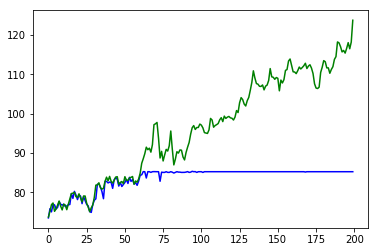

In [145]:
knr_predictions = knr.predict(test_features_scaled)
plt.plot(knr_predictions[:200], c='blue')
plt.plot(test_target.values.tolist()[:200], c='green')
plt.show()

In [181]:
print("Правильность на обучающем наборе: %.4f" % knr.score(train_features_scaled, train_target))
print("Правильность на тестовом наборе: %.4f" % knr.score(test_features_scaled, test_target))

Правильность на обучающем наборе: 1.0000
Правильность на тестовом наборе: -1.5759


In [147]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_features_scaled, train_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

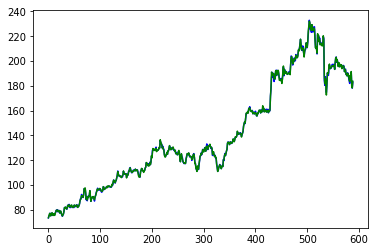

In [150]:
lr_predictions = lr.predict(test_features_scaled)
plt.plot(lr_predictions, c='blue')
plt.plot(test_target.values.tolist(), c='green')
plt.show()

In [180]:
print("Правильность на обучающем наборе: %.4f" % lr.score(train_features_scaled, train_target))
print("Правильность на тестовом наборе: %.4f" % lr.score(test_features_scaled, test_target))

Правильность на обучающем наборе: 0.9989
Правильность на тестовом наборе: 0.9998


In [18]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_features_scaled, train_target)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [24]:
p = ridge.predict([[0.68690351,  0.67092634,  0.63475935,  0.64903916, -0.73922116,
         0.64458445,  0.64056894,  0.62933942,  0.65490576, -0.7694075 ,
         0.65498757,  0.74830473,  0.67590819,  0.77136266,  0.07125648,
         0.77507511,  0.79106297,  0.7964571 ,  0.79594853,  0.89827193,
         0.79797789,  0.78361049,  0.79361029,  0.79056248, -0.33122932,
         0.79131609,  0.7720053 ,  0.77653772,  0.75879514, -0.65599519,
         0.75958877,  0.76165937,  0.77479855,  0.77911745, -0.92728655,
         0.77804419,  0.77221618,  0.75552748,  0.75389648, -0.73844219,
         0.74724916]])

In [26]:
print(p)

test_target

[73.62203801]


1000     73.76
1001     75.21
1002     76.90
1003     77.31
1004     75.20
1005     75.80
1006     76.82
1007     77.82
1008     76.51
1009     75.56
1010     77.03
1011     76.80
1012     75.62
1013     77.00
1014     78.45
1015     79.70
1016     79.81
1017     80.03
1018     78.93
1019     78.75
1020     79.65
1021     78.65
1022     77.60
1023     79.09
1024     79.09
1025     77.29
1026     76.26
1027     75.13
1028     76.10
1029     76.80
         ...  
1560    197.62
1561    195.49
1562    198.68
1563    198.27
1564    195.29
1565    196.70
1566    196.03
1567    197.00
1568    193.80
1569    195.50
1570    196.00
1571    196.02
1572    195.39
1573    191.30
1574    193.10
1575    192.50
1576    189.32
1577    189.20
1578    188.00
1579    190.14
1580    189.26
1581    187.45
1582    185.00
1583    183.50
1584    188.44
1585    186.43
1586    191.50
1587    179.90
1588    178.27
1589    183.66
Name: CLOSE9, Length: 589, dtype: float64

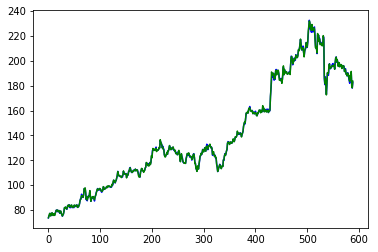

In [182]:
ridge_predictions = ridge.predict(test_features_scaled)
plt.plot(ridge_predictions, c='blue')
plt.plot(test_target.values.tolist(), c='green')
plt.show()

In [183]:
print("Правильность на обучающем наборе: %.4f" % ridge.score(train_features_scaled, train_target))
print("Правильность на тестовом наборе: %.4f" % ridge.score(test_features_scaled, test_target))

Правильность на обучающем наборе: 0.9988
Правильность на тестовом наборе: 0.9997


In [184]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_features_scaled, train_target)

/usr/local/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

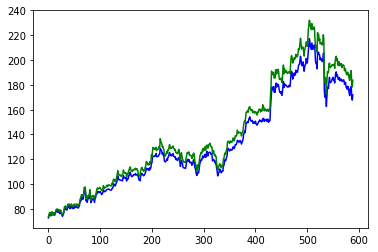

In [185]:
lasso_predictions = lasso.predict(test_features_scaled)
plt.plot(lasso_predictions, c='blue')
plt.plot(test_target.values.tolist(), c='green')
plt.show()

In [192]:
print("Правильность на обучающем наборе: %.4f" % lasso.score(train_features_scaled, train_target))
print("Правильность на тестовом наборе: %.4f" % lasso.score(test_features_scaled, test_target))
print("Количество использованных признаков: %d" % np.sum(lasso.coef_ != 0))

Правильность на обучающем наборе: 0.9900
Правильность на тестовом наборе: 0.9657
Количество использованных признаков: 8


In [195]:
to_day_data = [[182.8000000,184.5000000,182.4000000,183.9400000,1073500,
    183.8500000,184.0200000,183.3800000,183.9000000,435300,
    183.8300000,184.4500000,183.1300000,183.3400000,603300,
    183.3400000,183.6900000,182.6400000,182.7500000,351600,
    182.7500000,183.8900000,182.7500000,183.0600000,248400,
    183.0600000,183.1800000,181.7800000,182.3800000,507800,
    182.2400000,183.4000000,182.0300000,183.2400000,525900,
    183.1400000,183.7500000,182.9000000,183.3000000,556000,
    183.3000000]]

print("Прогноз от knr: %.4f" % knr.predict(scaler.transform(to_day_data))[0])
print("Прогноз от lr: %.4f" % lr.predict(scaler.transform(to_day_data))[0])
print("Прогноз от ridge: %.4f" % ridge.predict(scaler.transform(to_day_data))[0])
print("Прогноз от lasso: %.4f" % lasso.predict(scaler.transform(to_day_data))[0])
print("Реальное значение: %.4f" % 182.9100000)


Прогноз от knr: 85.2905
Прогноз от lr: 183.4307
Прогноз от ridge: 183.2162
Прогноз от lasso: 172.3347
Реальное значение: 182.9100


In [1]:
res = pd.DataFrame(test_data["CLOSE9"].tolist(), columns = ["ACTUAL_CLOSE9"])
res["OPEN9"] = pd.Series(test_features["OPEN9"].tolist())
res["PREDICTED_CLOSE9"] = pd.Series(lr_predictions)
res["RESULT"] = np.where(res['PREDICTED_CLOSE9'] >= res['OPEN9'], res.ACTUAL_CLOSE9 - res.OPEN9, (res.OPEN9 - res.ACTUAL_CLOSE9))

print(np.sum(res["RESULT"]))

NameError: name 'pd' is not defined